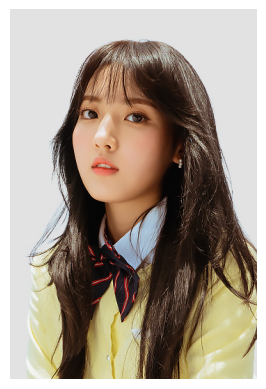

<class 'PIL.JpegImagePlugin.JpegImageFile'>
----------------------------------------------------------------------------------------------------
(533, 355, 3)
----------------------------------------------------------------------------------------------------


In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 加载图像
img = Image.open('luke.jpg')

# 显示图像
plt.imshow(img)
plt.axis('off')
plt.show()

# 打印图像类型和形状
print(type(img))
print('-' * 100)
img_array = np.array(img, dtype=np.float32)
print(img_array.shape)
print('-' * 100)

In [2]:
# PyTorch 需要的输入是四维张量，batch_size, channels, height, width
# 由于我们只有一张图片，所以使用 unsqueeze 方法增加一个维度
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)

(1, 533, 355, 3)


In [16]:
# 定义transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 调整图像大小
    # transforms.RandomRotation(90),  # 随机旋转
    # transforms.RandomHorizontalFlip(),  # 随机水平翻转
    # transforms.RandomVerticalFlip(p=1.0),  # 随机垂直翻转
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # 随机调整亮度、对比度、饱和度、色调
    # transforms.RandomCrop((224, 224)),  # 随机裁剪
    # transforms.RandomGrayscale(p=0.7),  # p是转换为灰度的概率

    # 随机透视变换
    # transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # p是应用变换的概率
    # 随机颜色反转
    # transforms.RandomInvert(p=0.5),
    # 随机调整锐度
    # transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.1),
    # 随机自动对比度
    # transforms.RandomAutocontrast(p=0.1),
    transforms.ToTensor(),  # 转换为Tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 标准化
])

# 使用transforms加载图像
img_t = transform(img)

# 打印转换后的图像张量形状
print(img_t.shape)


torch.Size([3, 256, 256])


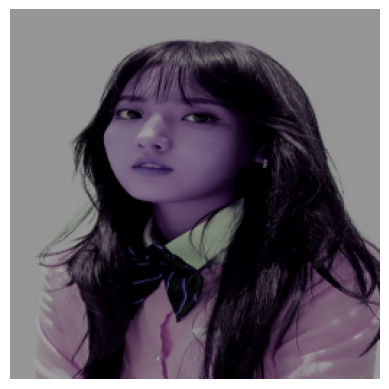

In [17]:
# 使用matplotlib显示经过transforms处理后的图像
plt.imshow(np.transpose(img_t, (1, 2, 0)))
plt.axis('off')
plt.show()

In [2]:
# img = Image.open('luke.jpg').convert('RGB')
# img_array = np.array(img, dtype=np.float32)
# print(img_array.shape)

(533, 355, 3)


In [ ]:
# 增加了模型的泛化能力，提升了模型的鲁棒性和适应性。